In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [14]:
sales = pd.read_csv('sales_data.csv', parse_dates=['Date'])

In [6]:
sales.head()
sales['Customer_Age'].mean()

35.91921157861212

<AxesSubplot: ylabel='Density'>

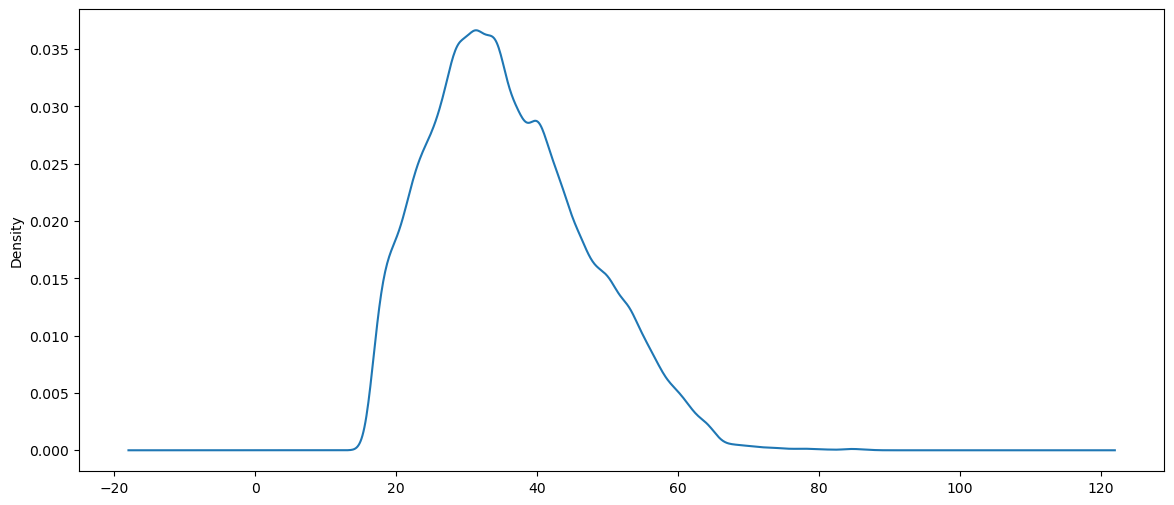

In [9]:
sales['Customer_Age'].plot(kind='kde', figsize=(14,6))

<AxesSubplot: >

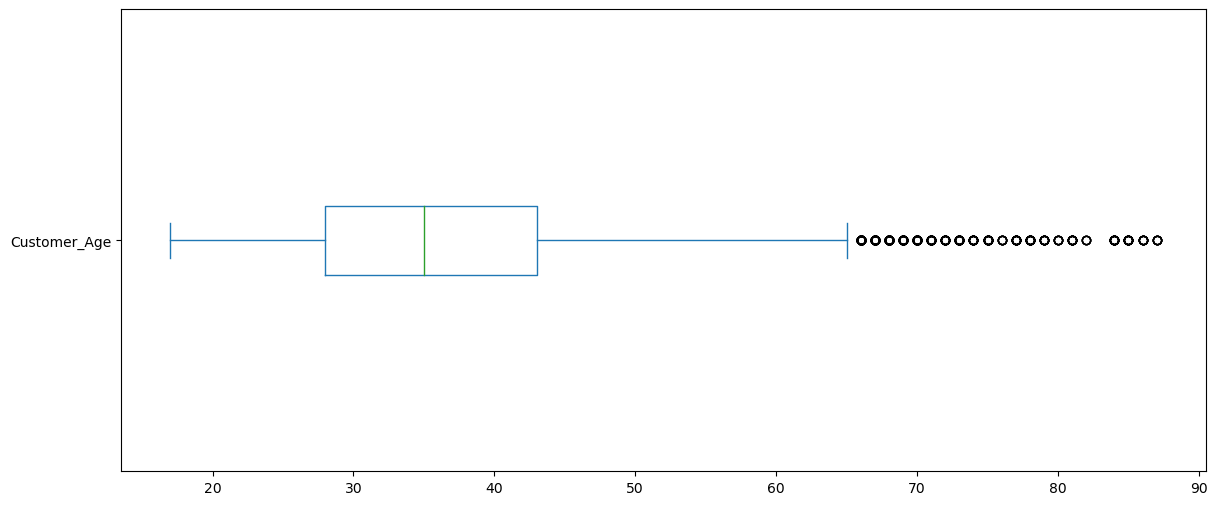

In [11]:
sales['Customer_Age'].plot(kind='box', vert=False,figsize=(14,6))

In [15]:
sales['Order_Quantity'].mean()

11.901659648253654

<AxesSubplot: ylabel='Frequency'>

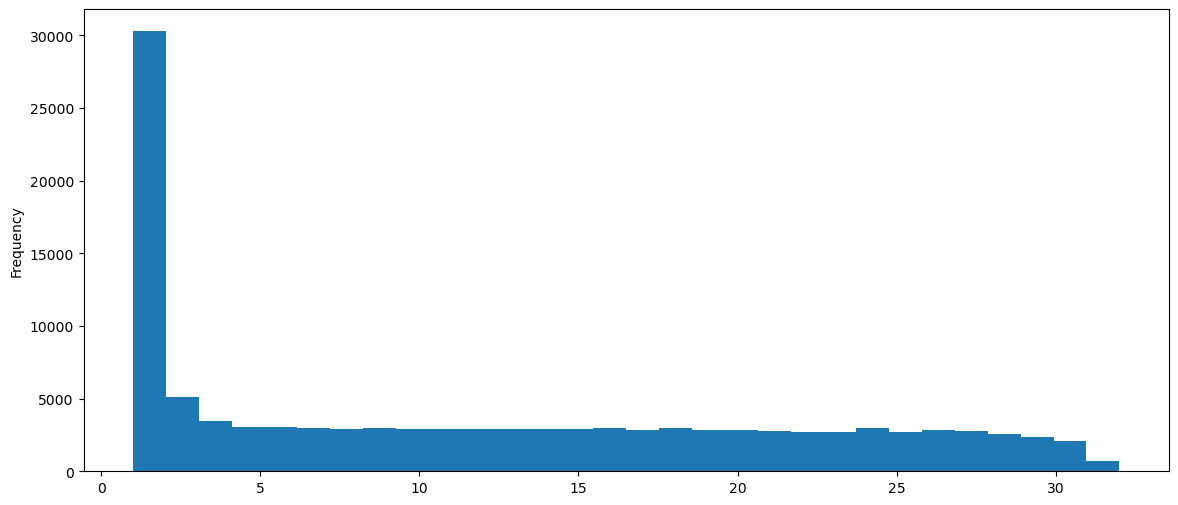

In [17]:
sales['Order_Quantity'].plot(kind='hist',bins=30, figsize=(14,6))

<AxesSubplot: >

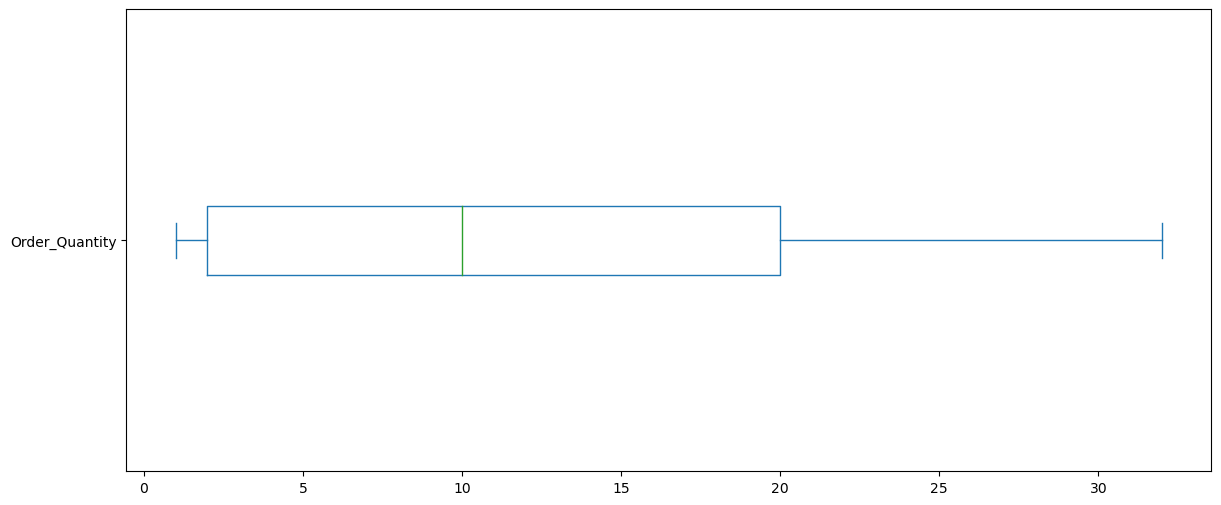

In [18]:
sales['Order_Quantity'].plot(kind='box', vert=False,figsize=(14,6))

In [19]:
sales['Year'].value_counts()

2014    29398
2016    29398
2013    24443
2015    24443
2012     2677
2011     2677
Name: Year, dtype: int64

<AxesSubplot: ylabel='Year'>

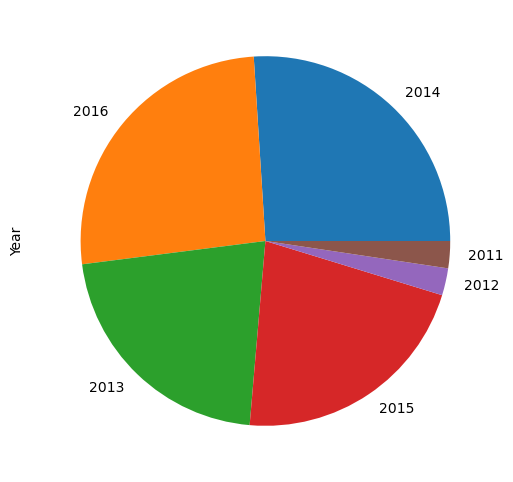

In [20]:
sales['Year'].value_counts().plot(kind='pie',figsize=(14,6))

<AxesSubplot: >

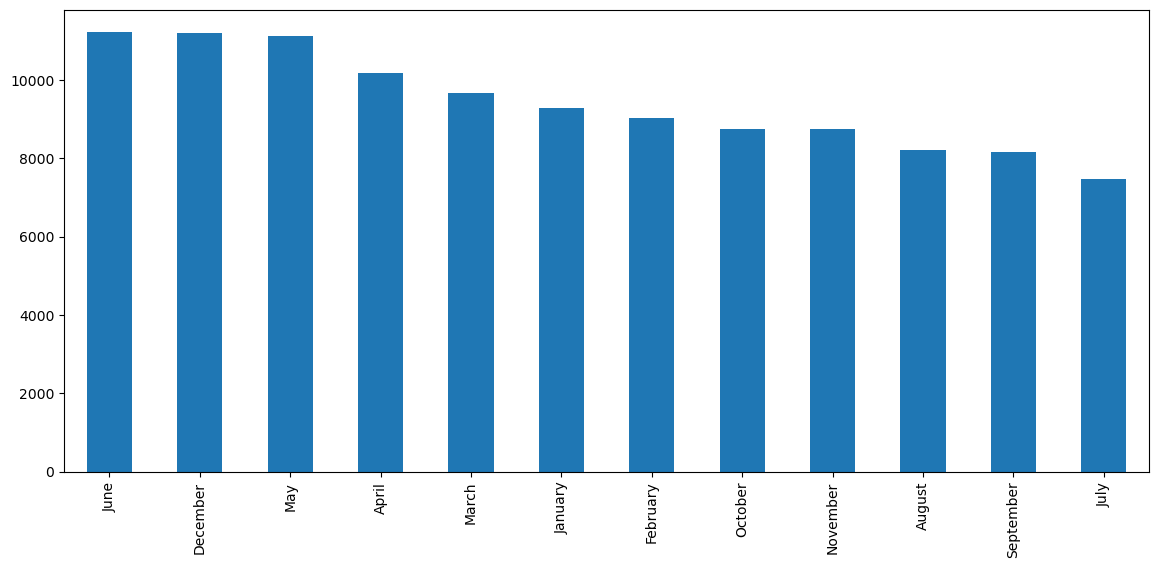

In [24]:
sales['Month'].value_counts().plot(kind='bar',figsize=(14,6))

In [23]:
sales['Month'].value_counts()

June         11234
December     11200
May          11128
April        10182
March         9674
January       9284
February      9022
October       8750
November      8734
August        8200
September     8166
July          7462
Name: Month, dtype: int64

In [25]:
sales.head()

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
0,2013-11-26,26,November,2013,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
1,2015-11-26,26,November,2015,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
2,2014-03-23,23,March,2014,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,23,45,120,1366,1035,2401
3,2016-03-23,23,March,2016,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,20,45,120,1188,900,2088
4,2014-05-15,15,May,2014,47,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,4,45,120,238,180,418


In [27]:
sales['Country'].value_counts().head(1)

United States    39206
Name: Country, dtype: int64

<AxesSubplot: ylabel='Country'>

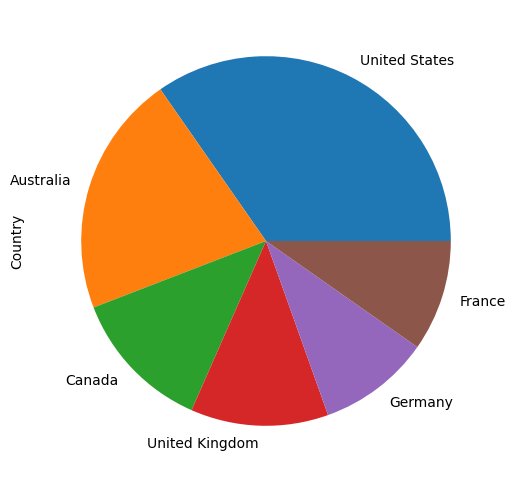

In [29]:
sales['Country'].value_counts().plot(kind='pie',figsize=(14,6))

In [31]:
sales['Product'].unique()

array(['Hitch Rack - 4-Bike', 'All-Purpose Bike Stand',
       'Mountain Bottle Cage', 'Water Bottle - 30 oz.',
       'Road Bottle Cage', 'AWC Logo Cap', 'Bike Wash - Dissolver',
       'Fender Set - Mountain', 'Half-Finger Gloves, L',
       'Half-Finger Gloves, M', 'Half-Finger Gloves, S',
       'Sport-100 Helmet, Black', 'Sport-100 Helmet, Red',
       'Sport-100 Helmet, Blue', 'Hydration Pack - 70 oz.',
       'Short-Sleeve Classic Jersey, XL',
       'Short-Sleeve Classic Jersey, L', 'Short-Sleeve Classic Jersey, M',
       'Short-Sleeve Classic Jersey, S', 'Long-Sleeve Logo Jersey, M',
       'Long-Sleeve Logo Jersey, XL', 'Long-Sleeve Logo Jersey, L',
       'Long-Sleeve Logo Jersey, S', 'Mountain-100 Silver, 38',
       'Mountain-100 Silver, 44', 'Mountain-100 Black, 48',
       'Mountain-100 Silver, 48', 'Mountain-100 Black, 38',
       'Mountain-200 Silver, 38', 'Mountain-100 Black, 44',
       'Mountain-100 Silver, 42', 'Mountain-200 Black, 46',
       'Mountain-200 Silver

<AxesSubplot: >

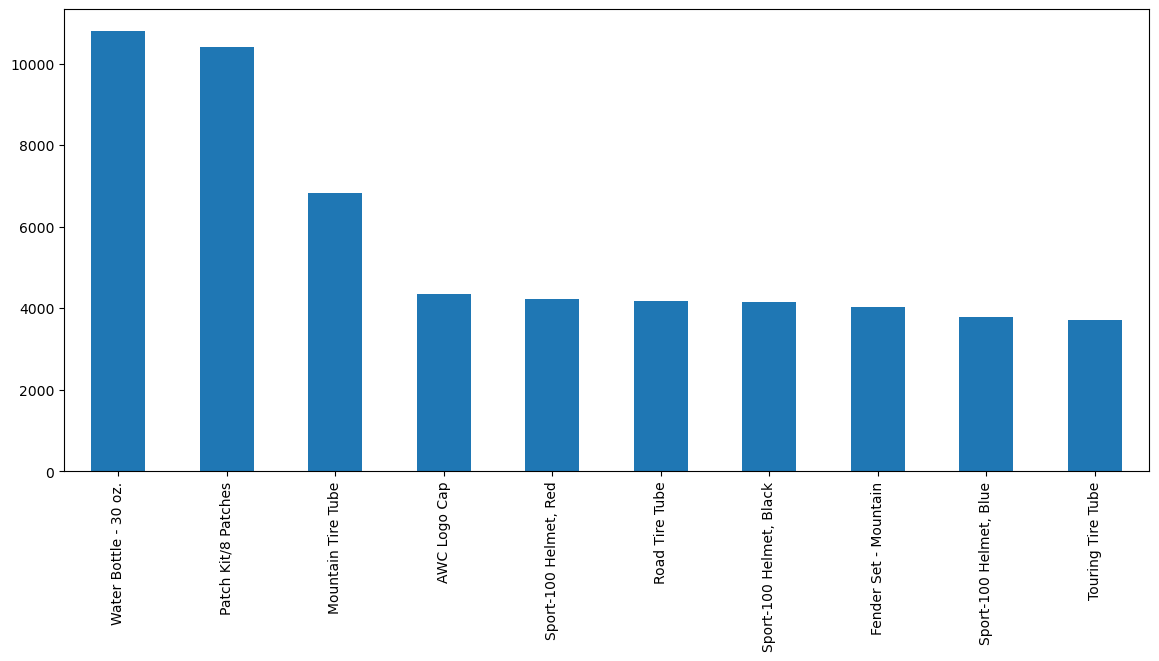

In [33]:
sales['Product'].value_counts().head(10).plot(kind='bar',figsize=(14,6))

<AxesSubplot: xlabel='Unit_Cost', ylabel='Unit_Price'>

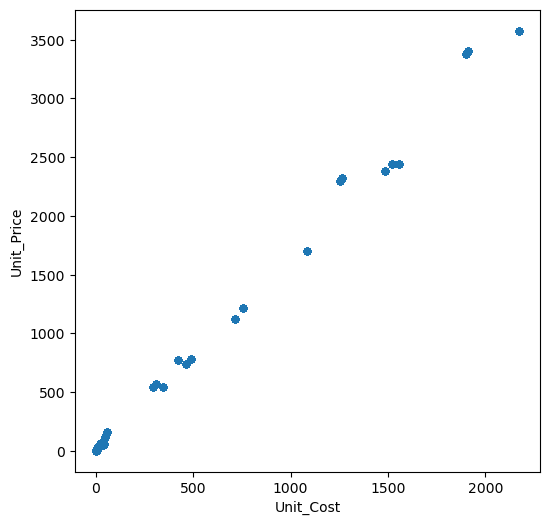

In [36]:
sales.plot(kind='scatter',x='Unit_Cost',y='Unit_Price',figsize=(6,6))

<AxesSubplot: xlabel='Order_Quantity', ylabel='Profit'>

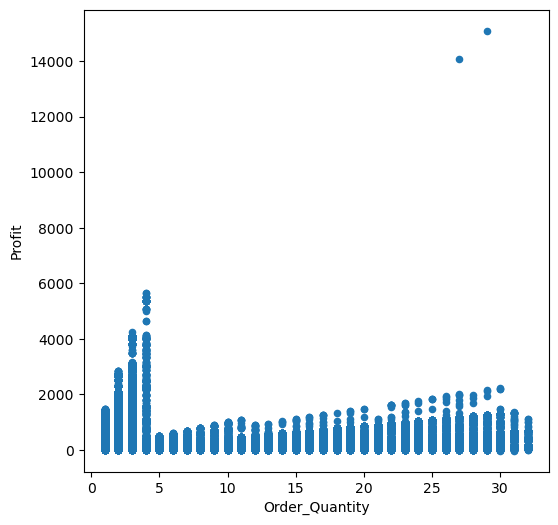

In [37]:
sales.plot(kind='scatter',x='Order_Quantity',y='Profit',figsize=(6,6))

<AxesSubplot: title={'center': 'Profit'}, xlabel='[Country]'>

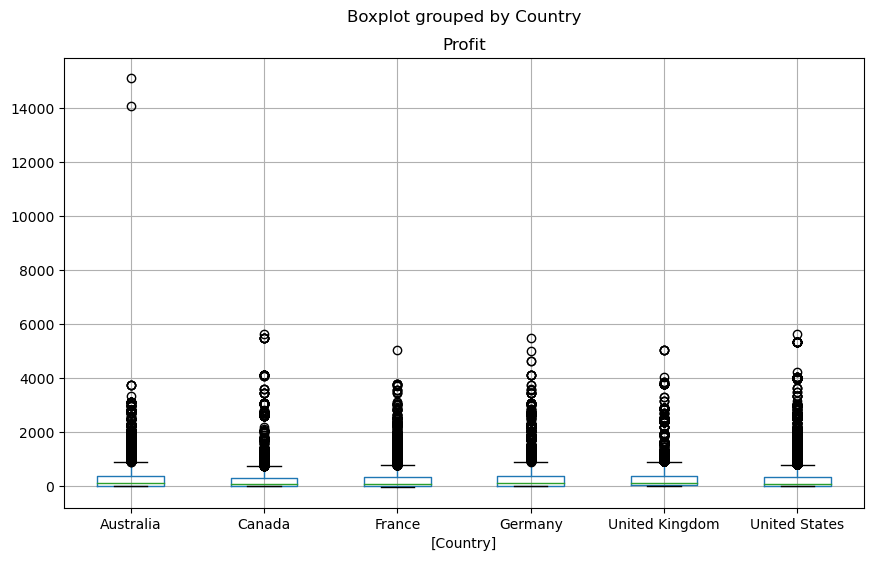

In [38]:
sales[['Profit','Country']].boxplot(by='Country',figsize=(10,6))

<AxesSubplot: title={'center': 'Customer_Age'}, xlabel='[Country]'>

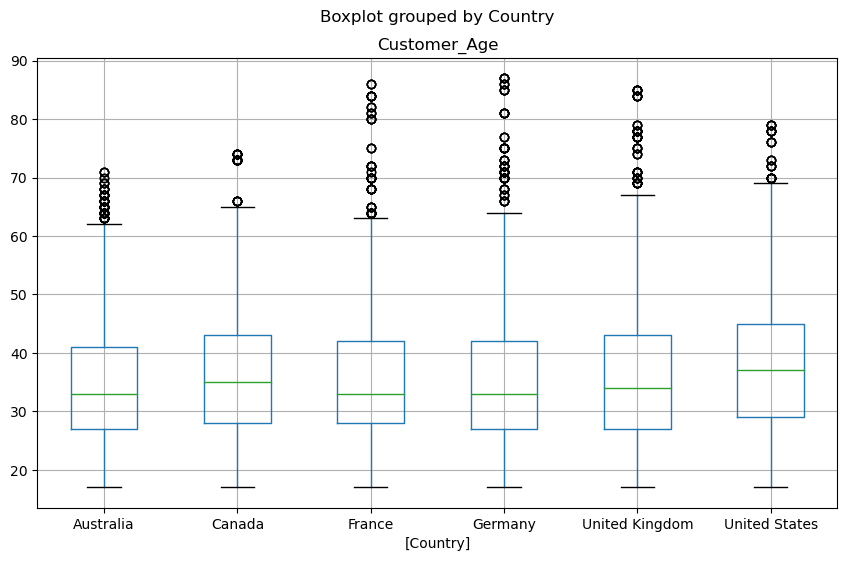

In [39]:
sales[['Customer_Age','Country']].boxplot(by='Country',figsize=(10,6))

In [46]:
sales['Calculated_Date'] = sales[['Year','Month','Day']].apply(lambda x: '{}-{}-{}'.format(x[0],x[1],x[2]),axis=1)
sales['Calculated_Date'] = pd.to_datetime(sales['Calculated_Date'])
sales['Calculated_Date']

0        2013-11-26
1        2015-11-26
2        2014-03-23
3        2016-03-23
4        2014-05-15
            ...    
113031   2016-04-12
113032   2014-04-02
113033   2016-04-02
113034   2014-03-04
113035   2016-03-04
Name: Calculated_Date, Length: 113036, dtype: datetime64[ns]

<AxesSubplot: >

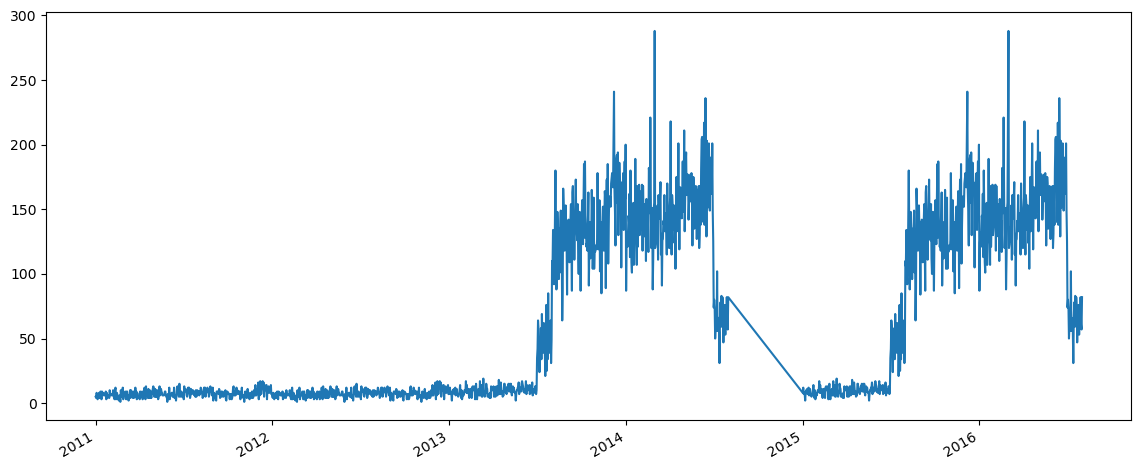

In [47]:
sales['Calculated_Date'].value_counts().plot(kind='line',figsize=(14,6))

In [48]:
sales['Revenue'] += 50

In [56]:
sales.loc[(sales['Country'] == 'Canada') | (sales['Country'] == 'France')].shape[0]

25176

In [58]:
sales.loc[(sales['Country'] == 'Canada')].shape[0]

14178

In [62]:
sales.loc[(sales['Country'] == 'Canada') & (sales['Sub_Category'] == 'Bike Racks')].shape[0]

104

In [64]:
france_states = sales.loc[(sales['Country'] == 'France'), 'State'].value_counts()
france_states

Seine (Paris)        2328
Seine Saint Denis    1684
Nord                 1670
Hauts de Seine       1084
Essonne               994
Yveline               954
Seine et Marne        394
Moselle               386
Loiret                382
Val d'Oise            264
Garonne (Haute)       208
Val de Marne          158
Charente-Maritime     148
Somme                 134
Loir et Cher          120
Pas de Calais          90
Name: State, dtype: int64

<AxesSubplot: >

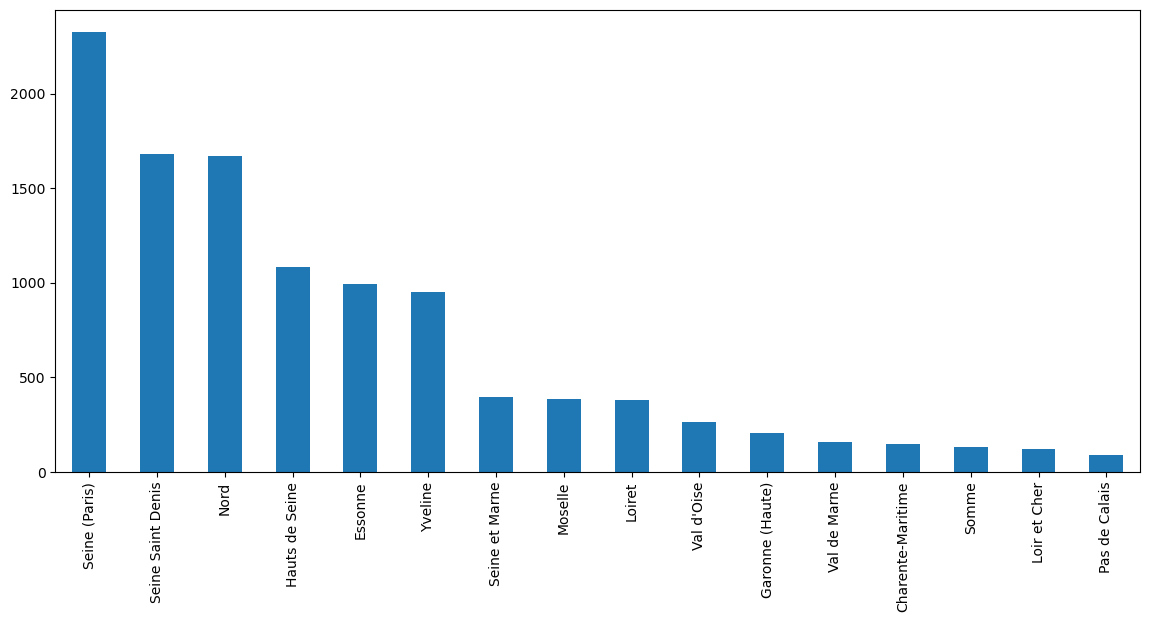

In [65]:
france_states.plot(kind='bar',figsize=(14,6))

In [67]:
sales['Product_Category'].value_counts()

Accessories    70120
Bikes          25982
Clothing       16934
Name: Product_Category, dtype: int64

<AxesSubplot: ylabel='Product_Category'>

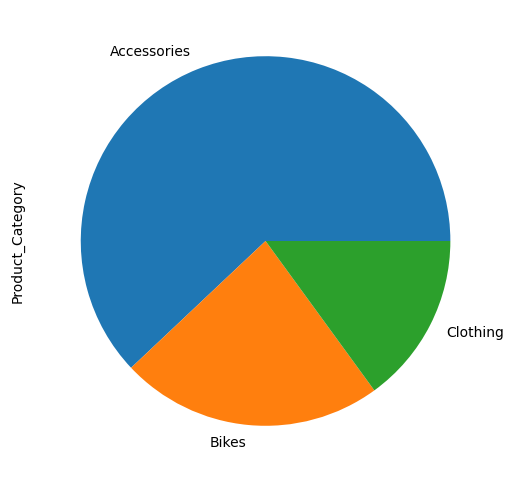

In [69]:
sales['Product_Category'].value_counts().plot(kind='pie',figsize=(6,6))

In [75]:
accessories = sales.loc[(sales['Product_Category'] == 'Accessories', 'Sub_Category')].value_counts()
accessories

Tires and Tubes      33870
Bottles and Cages    15876
Helmets              12158
Fenders               4032
Cleaners              1802
Hydration Packs       1334
Bike Racks             592
Bike Stands            456
Name: Sub_Category, dtype: int64

<AxesSubplot: >

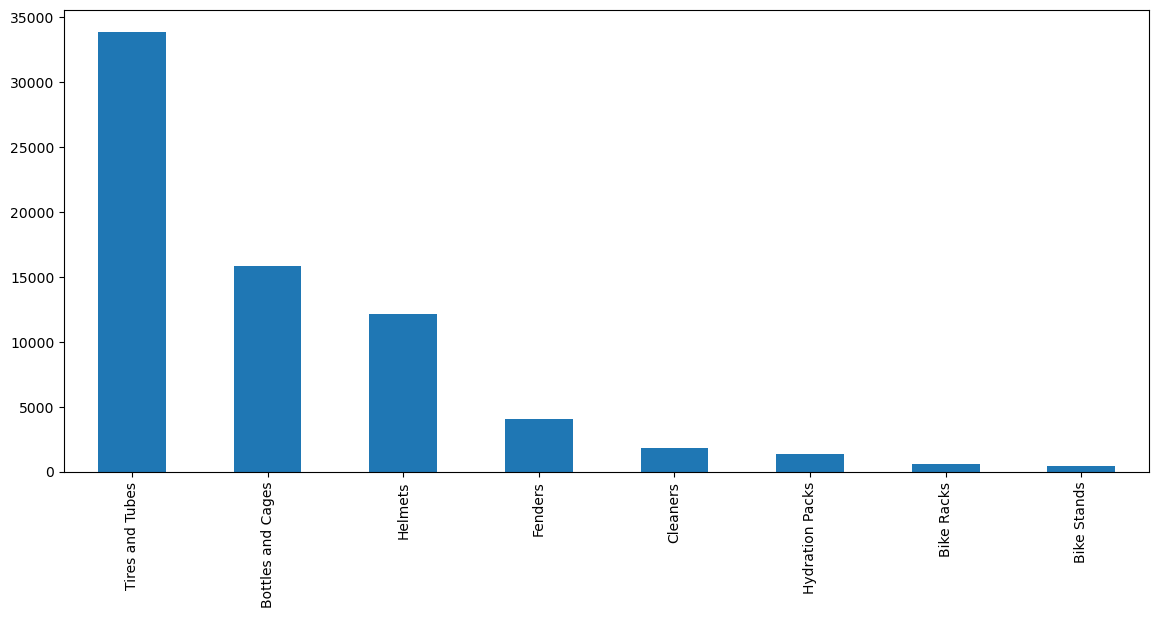

In [76]:
accessories.plot(kind = 'bar', figsize=(14,6))

In [77]:
bikes = sales.loc[(sales['Product_Category'] == 'Bikes', 'Sub_Category')].value_counts()
bikes

Road Bikes        13430
Mountain Bikes     8854
Touring Bikes      3698
Name: Sub_Category, dtype: int64

<AxesSubplot: ylabel='Sub_Category'>

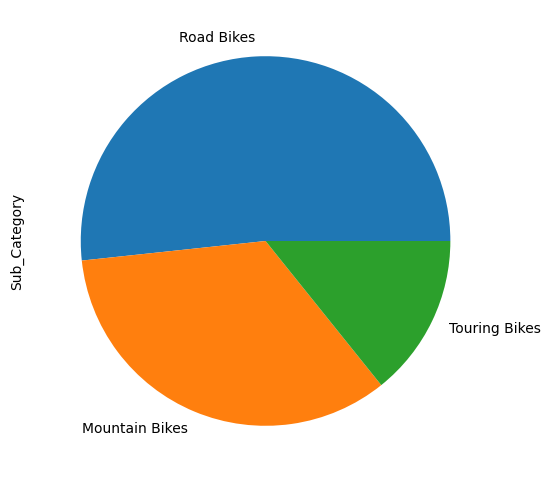

In [78]:
bikes.plot(kind='pie',figsize=(6,6))

In [81]:
sales['Customer_Gender'].value_counts()

M    58312
F    54724
Name: Customer_Gender, dtype: int64

<AxesSubplot: >

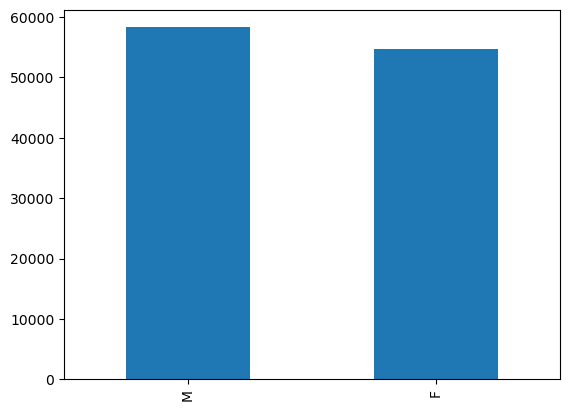

In [82]:
sales['Customer_Gender'].value_counts().plot(kind='bar')

In [84]:
sales.loc[(sales['Customer_Gender']=='M') & (sales['Revenue']==500)].shape[0]

50

In [85]:
sales.sort_values(['Revenue'],ascending=False).head(5)

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue,Calculated_Date
112073,2015-07-24,24,July,2015,52,Adults (35-64),M,Australia,Queensland,Clothing,Vests,"Touring-1000 Yellow, 50",29,1482,2384,15096,42978,58124,2015-07-24
112072,2013-07-24,24,July,2013,52,Adults (35-64),M,Australia,Queensland,Clothing,Vests,"Touring-1000 Yellow, 50",27,1482,2384,14055,40014,54119,2013-07-24
71129,2011-07-08,8,July,2011,22,Youth (<25),M,Canada,Alberta,Bikes,Road Bikes,"Road-150 Red, 48",4,2171,3578,5628,8684,14362,2011-07-08
70307,2011-04-30,30,April,2011,44,Adults (35-64),M,Canada,British Columbia,Bikes,Road Bikes,"Road-150 Red, 62",4,2171,3578,5485,8684,14219,2011-04-30
70601,2011-09-30,30,September,2011,19,Youth (<25),F,Canada,British Columbia,Bikes,Road Bikes,"Road-150 Red, 62",4,2171,3578,5485,8684,14219,2011-09-30


In [86]:
sales.sort_values(['Revenue'],ascending=False).head(1)

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue,Calculated_Date
112073,2015-07-24,24,July,2015,52,Adults (35-64),M,Australia,Queensland,Clothing,Vests,"Touring-1000 Yellow, 50",29,1482,2384,15096,42978,58124,2015-07-24


In [88]:
sales.loc[(sales['Revenue']>10000), 'Order_Quantity'].mean()

3.689265536723164

In [89]:
cond = sales['Revenue'] > 10000
sales.loc[cond,'Order_Quantity'].mean()

3.689265536723164

In [ ]:
sales.loc[(sales['Revenue']<10000), 'Order_Quantity'].mean()

11.914539380997528

In [92]:
sales.loc[(sales['Year']==2016)&(sales['Month']=='May')].shape[0]

5015

In [95]:
sales.loc[(sales['Year']==2016)&(sales['Month']=='May')].shape[0]

5015

In [99]:
sales.loc[(sales['Year']==2016)&(sales['Month'].isin(['May', 'June', 'July']))].shape[0]


12164

<AxesSubplot: title={'center': 'Profit'}, xlabel='[Month]'>

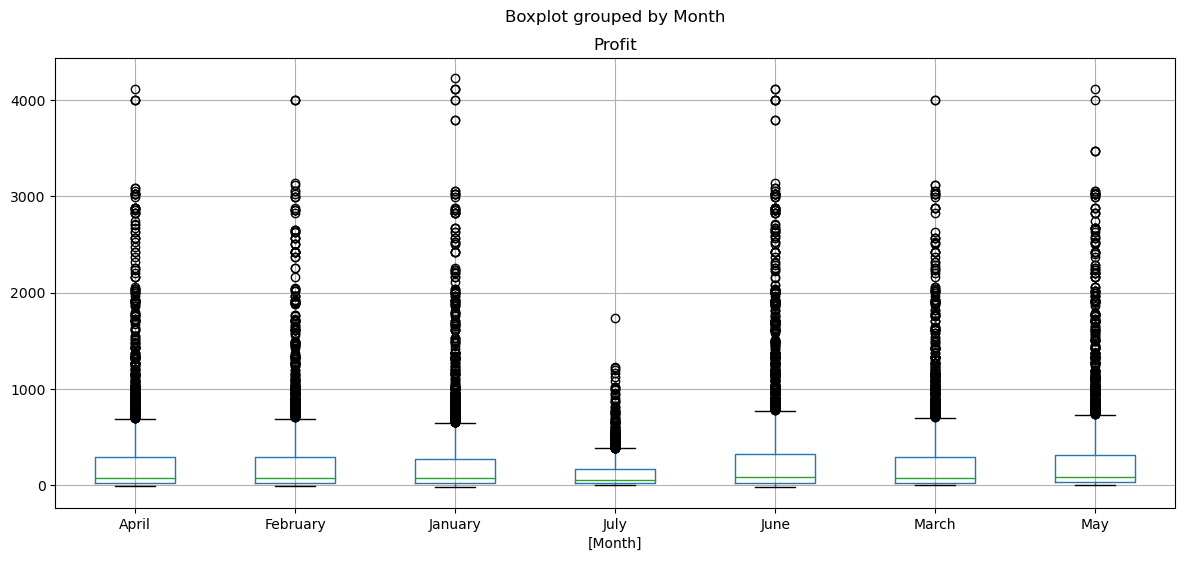

In [100]:
profit_2016 = sales.loc[sales['Year']==2016,['Profit','Month']]
profit_2016.boxplot(by='Month',figsize=(14,6))

In [101]:
sales.loc[sales['Country']=='United States', 'Unit_Price'] *= 1.072